In [5]:
#bring dependencies
import pandas as pd
import requests
import json
from pprint import pprint
from prettytable import PrettyTable
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv ("C://Users//lulum\Downloads//inflation interest unemployment.csv.zip")
df


,country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
0,Afghanistan,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
1,Afghanistan,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
2,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
3,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
4,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,Zimbabwe,2017,0.893962,2.437608,4.370035,3.274167,6.914167,NaN,4.785,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13828,Zimbabwe,2018,10.618866,59.803356,-32.960315,2.532500,7.131667,NaN,4.796,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13829,Zimbabwe,2019,255.304991,440.829791,-78.517887,2.975000,16.181667,16.860001,4.833,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13830,Zimbabwe,2020,557.201817,558.560024,-79.803157,4.518333,33.008333,NaN,5.351,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income


# Look at the United States

In [27]:
df.loc[df['country'] == 'United States'].tail(12)

,country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
13196,United States,2010,1.640043,1.165251,2.060737,NaN,3.250000,9.63,9.630,USA,US,NaN,High income
13197,United States,2011,3.156842,2.088904,1.137338,NaN,3.250000,8.95,8.950,USA,US,NaN,High income
13198,United States,2012,2.069337,1.917849,1.307083,NaN,3.250000,8.07,8.070,USA,US,NaN,High income
13199,United States,2013,1.464833,1.754916,1.469299,NaN,3.250000,7.37,7.370,USA,US,NaN,High income
13200,United States,2014,1.622223,1.849827,1.374742,NaN,3.250000,6.17,6.170,USA,US,NaN,High income
13201,United States,2015,0.118627,0.952532,2.285696,NaN,3.260000,5.28,5.280,USA,US,NaN,High income
13202,United States,2016,1.261583,1.049247,2.436851,NaN,3.511667,4.87,4.870,USA,US,NaN,High income
13203,United States,2017,2.130110,1.880068,2.175694,NaN,4.096667,4.36,4.360,USA,US,NaN,High income
13204,United States,2018,2.442583,2.400981,2.444494,NaN,4.904167,3.90,3.900,USA,US,NaN,High income
13205,United States,2019,1.812210,1.785152,3.436010,NaN,5.282500,3.67,3.670,USA,US,NaN,High income


# Comparison of Inflation with Unemployment
## Analysis of United States
Let us look at what the data looks for in the United States.

In [5]:

us_inflation = df.loc[df['country'] == 'United States'][['year','Inflation, consumer prices (annual %)']]
us_inflation.rename(columns = {'Inflation, consumer prices (annual %)':'Inflation', 'year':'Year'},inplace=True)
us_inflation.set_index('Year',inplace=True)
us_inflation.tail(12)

,Inflation
Year,
2010,1.640043
2011,3.156842
2012,2.069337
2013,1.464833
2014,1.622223
2015,0.118627
2016,1.261583
2017,2.130110
2018,2.442583


In [6]:
us_unemployment = df.loc[df['country'] == 'United States'][['year','Unemployment, total (% of total labor force) (national estimate)']]
us_unemployment.rename(columns = {'Unemployment, total (% of total labor force) (national estimate)':'Unemployment', 'year':'Year'},inplace=True)
us_unemployment.set_index('Year',inplace=True)
us_unemployment.tail(12)

,Unemployment
Year,
2010,9.63
2011,8.95
2012,8.07
2013,7.37
2014,6.17
2015,5.28
2016,4.87
2017,4.36
2018,3.90


In [16]:
us_inflation = df.loc[df['country'] == 'United States'][['year','Inflation, consumer prices (annual %)']]
us_inflation.rename(columns = {'Inflation, consumer prices (annual %)':'Inflation', 'year':'Year'},inplace=True)
us_inflation.set_index('Year',inplace=True)
us_inflation.head()

,Inflation
Year,
1970,5.838255
1971,4.292767
1972,3.272278
1973,6.177760
1974,11.054805


Text(0, 0.5, 'Unemployment')

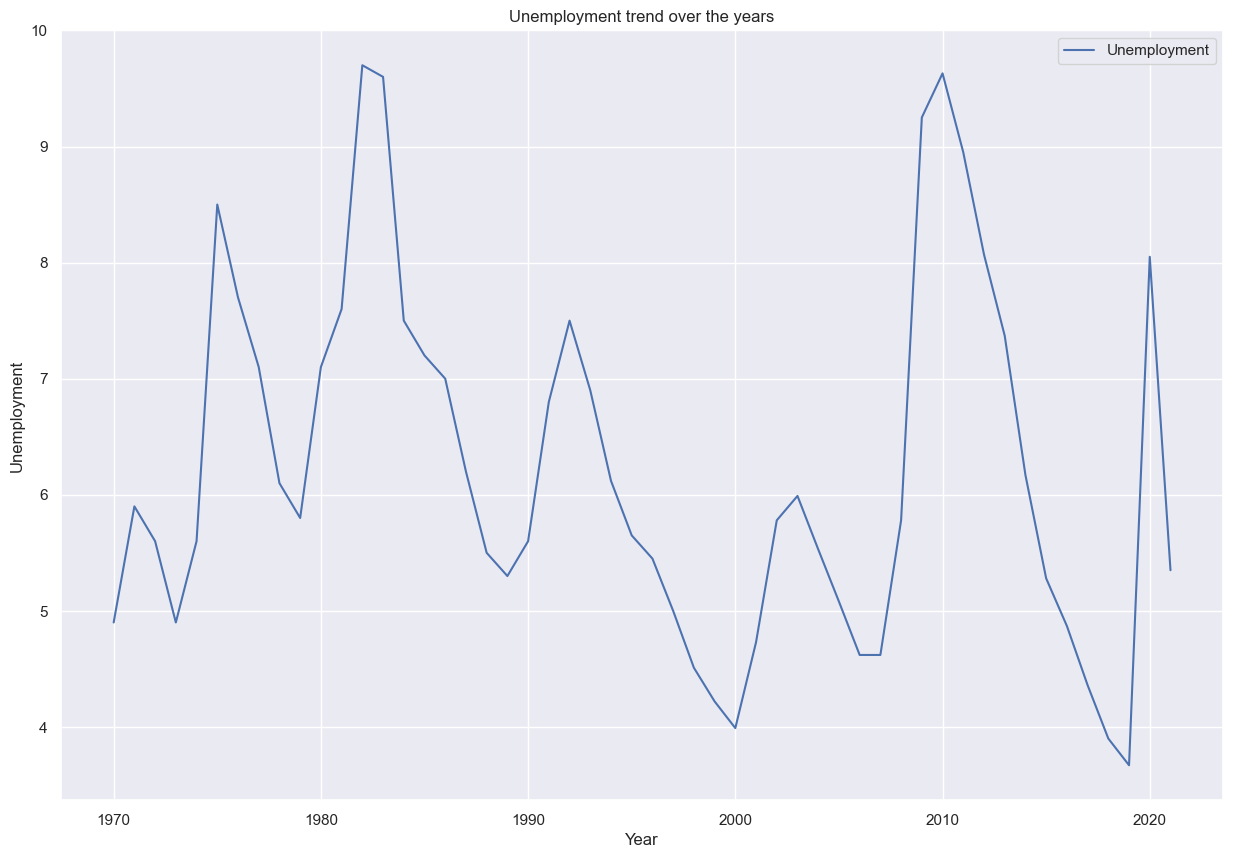

In [8]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(data = us_unemployment)
ax.set_title('Unemployment trend over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')

Text(0, 0.5, 'Inflation')

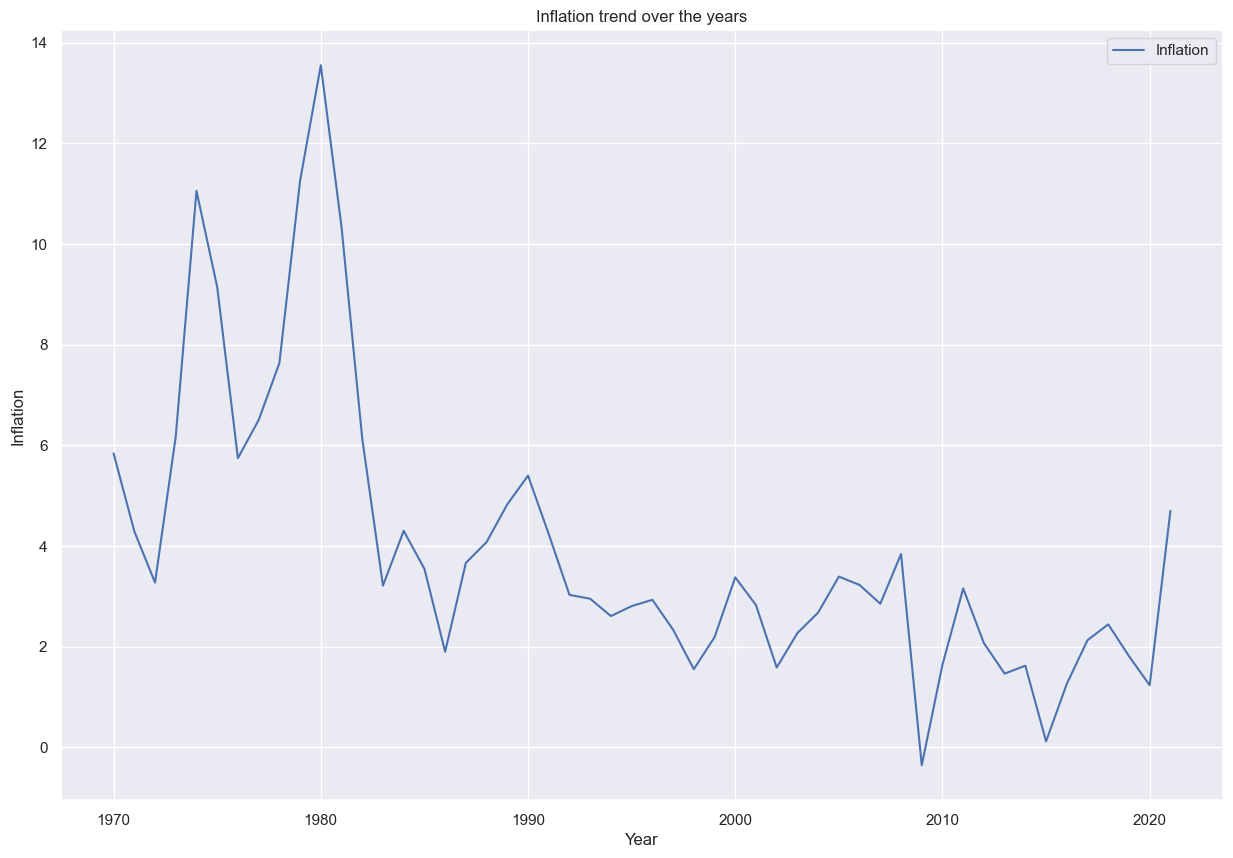

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(data = us_inflation)
ax.set_title('Inflation trend over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation')

In [20]:
us_unemployment_inflation = df.loc[df['country'] == 'United States'][['year','Inflation, consumer prices (annual %)','Unemployment, total (% of total labor force) (national estimate)']]
us_unemployment_inflation.rename(columns = {'Inflation, consumer prices (annual %)':'Inflation','Unemployment, total (% of total labor force) (national estimate)':'Unemployment', 'year':'Year'},inplace=True)
us_unemployment_inflation.set_index('Year',inplace=True)
us_unemployment_inflation.tail(12)

,Inflation,Unemployment
Year,,
2010,1.640043,9.63
2011,3.156842,8.95
2012,2.069337,8.07
2013,1.464833,7.37
2014,1.622223,6.17
2015,0.118627,5.28
2016,1.261583,4.87
2017,2.130110,4.36
2018,2.442583,3.90


Text(0.5, 0, 'Year')

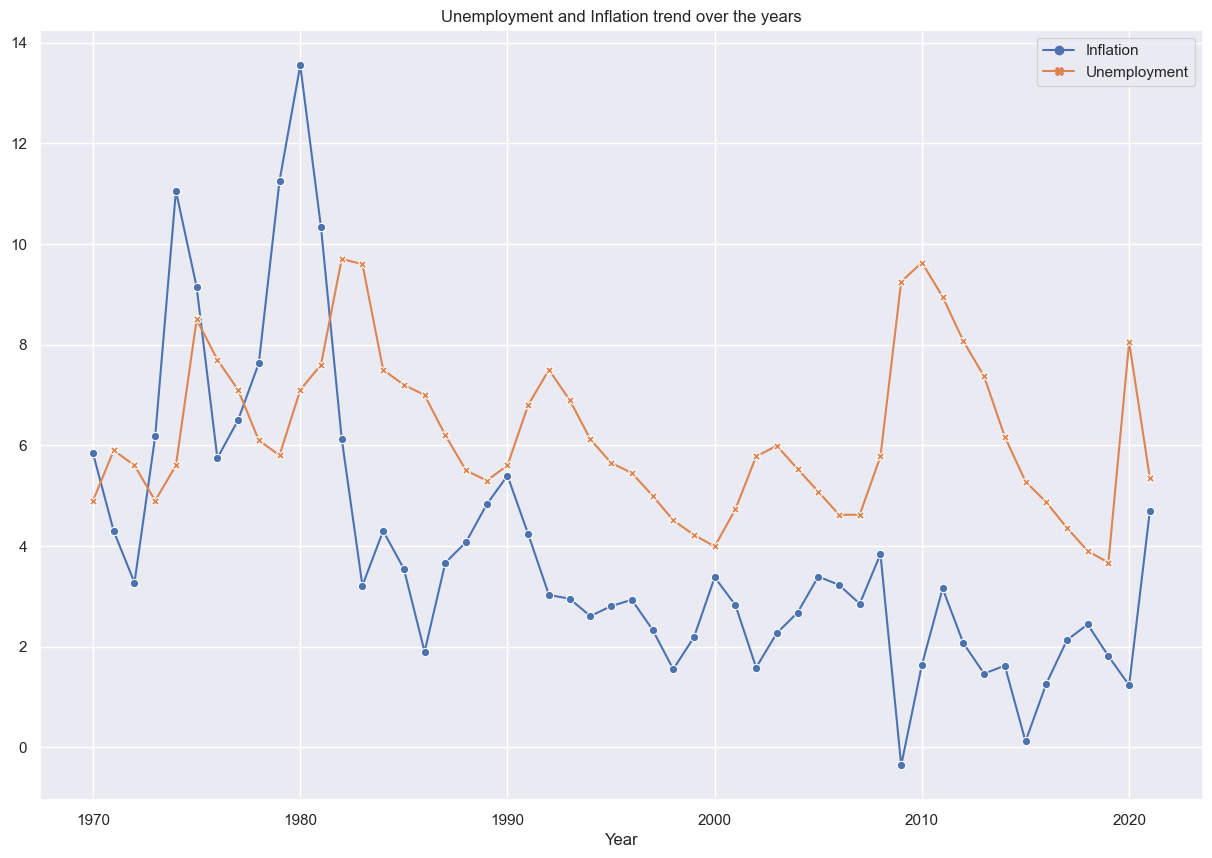

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(data = us_unemployment_inflation,markers=True,dashes=False)
ax.set_title('Unemployment and Inflation trend over the years')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

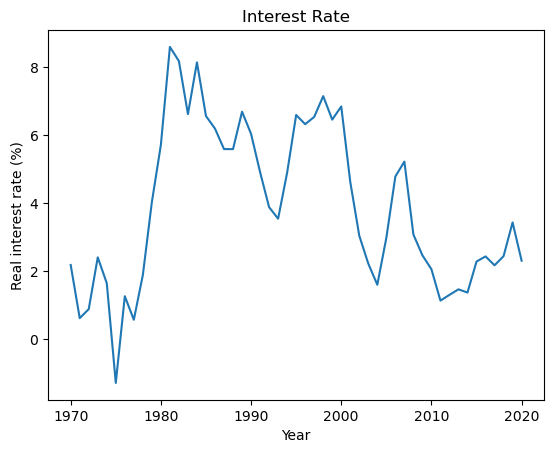

In [23]:
ax = sns.lineplot(y = df[df.country=='United States']['Real interest rate (%)'], x= df[df.country=='United States']['year'], markers=True,dashes=False)
ax.set_title('Interest Rate')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

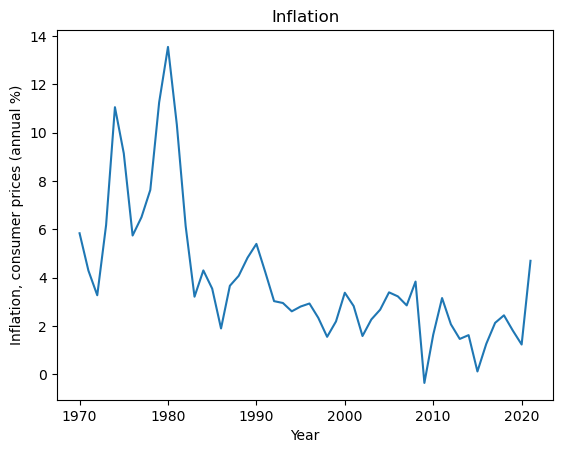

In [19]:
ax = sns.lineplot(y = df[df.country=='United States']['Inflation, consumer prices (annual %)'], x= df[df.country=='United States']['year'], markers=True,dashes=False)
ax.set_title('Inflation')
ax.set_xlabel('Year')